In [4]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [5]:
data = pd.read_csv('/content/drive/MyDrive/4213 Assignment 1/clean_hdb.csv', index_col='Unnamed: 0')

In [89]:
data.shape

(857396, 12)

In [46]:
data[data['storey_range'] == '31 TO 35']

,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,market,region,mature,dist to mrt,dist to mall
660991,2012-04-01,4 ROOM,31 TO 35,86.0,model a,2006,705000.0,False,central,1,0.323268,0.351053
660992,2012-04-01,4 ROOM,31 TO 35,86.0,model a,2006,708000.0,False,central,1,0.343609,0.343784


In [15]:
print('Number of transaction: ', data.shape[0])
print('Number of data fields per transactions: ', data.shape[1])

Number of transaction:  857396
Number of data fields per transactions:  12


In [36]:
data.storey_range.unique()

array(['04 TO 06', '01 TO 03', '07 TO 09', '10 TO 12', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [7]:
#Prepare our X and y data for regression:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# not use town
pipeline = ColumnTransformer([
                              ('o', OrdinalEncoder(), ['month','flat_type','storey_range']),
                              ('n', OneHotEncoder(), ['flat_model', 'region']),
], remainder='passthrough')

data['storey_range'] = data['storey_range'][filtered]
data['market'] = data['market'] == 'Y'
#data['storey_range'] = data['storey_range'][~data['storey_range'].str.contains('2012')]
X = pipeline.fit_transform(data.drop(['resale_price'], axis=1))
y = data['resale_price']

In [6]:
filtered = ~data['storey_range'].str.contains('2012')

In [29]:
# store the pipeline for the web
from pickle import dump
dump(pipeline, open('encoder3.pkl', 'wb'))

In [9]:
# change X to dataframe instead of array
col_name = ["month","type", "storey","2-room","Adjoined","Apartment","DBSS","Improved",
"Improved-M","Maisonette","Model A","Model A-M","Model A2",
"Multi Gen","New Gen","Premium Apt","Premium Apt Loft",
"Premium M","Simplified","Standard","Terrace","Type S1",
"Type S2", 'central', 'east', 'north', 'northeast', 'west', "Area", "Lease", "market", "mature", "min_dist_mrt_in_m", "min_dist_mall_in_m"]

#
df = pd.DataFrame(X, columns=col_name)

In [96]:
X.shape

(857396, 34)

In [79]:
df.head()

,month,type,storey,2-room,Adjoined,Apartment,DBSS,Improved,Improved-M,Maisonette,...,Terrace,Type S1,Type S2,Area,Lease,market,region,mature,min_dist_mrt_in_m,min_dist_mall_in_m
0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,73.0,1976,False,northeast,1,0.986748,0.843877
1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,67.0,1977,False,northeast,1,0.880909,0.755938
2,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,67.0,1977,False,northeast,1,0.584237,0.447619
3,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,67.0,1977,False,northeast,1,1.492898,1.357627
4,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,67.0,1977,False,northeast,1,1.492898,1.357627


In [10]:

X = df.values
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [11]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [30]:
# store scaler
dump(s_scaler, open('scaler.pkl', 'wb'))

In [14]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [15]:
# having 34 features
model = Sequential()
model.add(Dense(53,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(1))

loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer='Adam',loss=loss)

In [16]:
# train the model on train data
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=500)
model.summary()

Epoch 1/500
4488/4488 [==============================] - 28s 6ms/step - loss: 8494580736.0000 - val_loss: 3792231936.0000
Epoch 2/500
4488/4488 [==============================] - 17s 4ms/step - loss: 3707134720.0000 - val_loss: 3648587520.0000
Epoch 3/500
4488/4488 [==============================] - 17s 4ms/step - loss: 3624290304.0000 - val_loss: 3590872832.0000
Epoch 4/500
4488/4488 [==============================] - 18s 4ms/step - loss: 3570214656.0000 - val_loss: 3533915648.0000
Epoch 5/500
4488/4488 [==============================] - 17s 4ms/step - loss: 3509834240.0000 - val_loss: 3468894208.0000
Epoch 6/500
4488/4488 [==============================] - 17s 4ms/step - loss: 3434750976.0000 - val_loss: 3368314112.0000
Epoch 7/500
4488/4488 [==============================] - 18s 4ms/step - loss: 3220980736.0000 - val_loss: 2983334144.0000
Epoch 8/500
4488/4488 [==============================] - 18s 4ms/step - loss: 2535994112.0000 - val_loss: 1994396800.0000
Epoch 9/500
4488/4488 [=

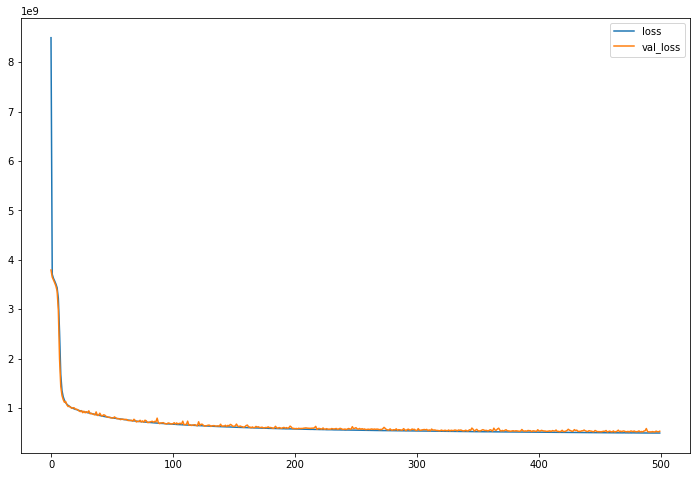

In [17]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 15992.406820509568
MSE: 529375098.49377584
RMSE: 23008.1528700975
VarScore: 0.9785393635450279


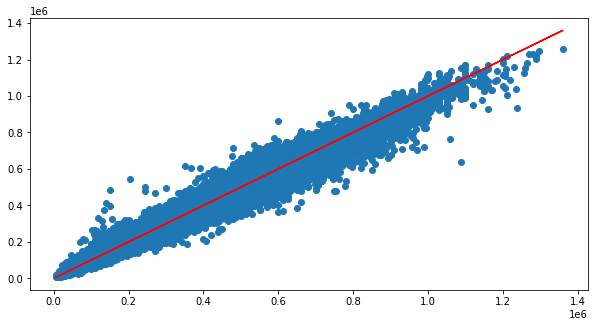

In [18]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [27]:
model.save('DL_model_final.h5')

In [28]:
model.save_weights('model_weights_final.h5')

In [19]:
y_trainpred = model.predict(X_train)

In [20]:
print('R2 Score:',metrics.r2_score(y_test,y_pred))

R2 Score: 0.978096397878554


In [21]:
print('R2 Score:',metrics.r2_score(y_train,y_trainpred))

R2 Score: 0.9796993701320774


In [22]:
# having 34 neuron is based on the number of available features
model_m = Sequential()
model_m.add(Dense(80, activation='relu'))
model_m.add(Dropout(0.2))
model_m.add(Dense(150, activation='relu'))
model_m.add(Dropout(0.5))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dropout(0.4))
model_m.add(Dense(60,activation='relu'))
model_m.add(Dense(1))

loss = tf.keras.losses.MeanSquaredError()
model_m.compile(optimizer='Adam',loss=loss)

In [23]:
# train the model on train data
model_m.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=512,epochs=200)
model_m.summary()

Epoch 1/200
1122/1122 [==============================] - 19s 16ms/step - loss: 20581132288.0000 - val_loss: 4028992000.0000
Epoch 2/200
1122/1122 [==============================] - 13s 11ms/step - loss: 6149484544.0000 - val_loss: 3837362432.0000
Epoch 3/200
1122/1122 [==============================] - 17s 15ms/step - loss: 6030693888.0000 - val_loss: 3778767360.0000
Epoch 4/200
1122/1122 [==============================] - 16s 14ms/step - loss: 5934035456.0000 - val_loss: 3715474944.0000
Epoch 5/200
1122/1122 [==============================] - 13s 12ms/step - loss: 5878636032.0000 - val_loss: 3743039488.0000
Epoch 6/200
1122/1122 [==============================] - 14s 12ms/step - loss: 5827777536.0000 - val_loss: 3665609216.0000
Epoch 7/200
1122/1122 [==============================] - 13s 11ms/step - loss: 5806532096.0000 - val_loss: 3676278784.0000
Epoch 8/200
1122/1122 [==============================] - 12s 11ms/step - loss: 5741466112.0000 - val_loss: 3685106176.0000
Epoch 9/200
112

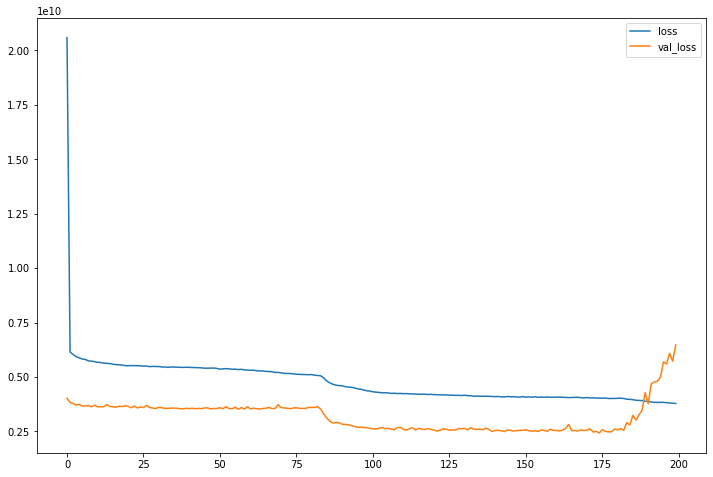

In [25]:
loss_df = pd.DataFrame(model_m.history.history)
loss_df.plot(figsize=(12,8))

MAE: 57858.577481775115
MSE: 6478665560.3271
RMSE: 80490.15815816924
VarScore: 0.8387120658555572


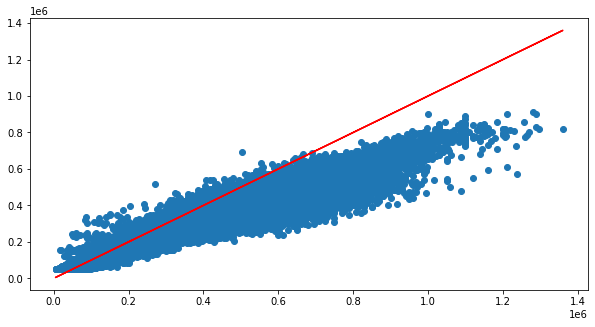

In [26]:
y_pred_m = model_m.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_m))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred_m))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred_m))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_m)
# Perfect predictions
plt.plot(y_test,y_test,'r')